In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: ÎßëÏùÄ Í≥†Îîï)
plt.rcParams['font.family'] = 'Malgun Gothic'

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("crime.csv", encoding='utf-8', low_memory=False)

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# ArrestÍ∞Ä True/FalseÎ°ú ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú 1/0ÏúºÎ°ú Î≥ÄÌôò
df['Arrest_numeric'] = df['Arrest'].astype(int)

# ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞: Community Area vs Arrest Ïó¨Î∂Ä
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Í≤∞Í≥º Ï∂úÎ†•
print("Chi-squared ÌÜµÍ≥ÑÎüâ:", round(chi2_stat, 4))
print("p-value:", p_value)
print("ÏûêÏú†ÎèÑ:", dof)


Chi-squared ÌÜµÍ≥ÑÎüâ: 199879.9195
p-value: 0.0
ÏûêÏú†ÎèÑ: 76


In [5]:
import numpy as np
from scipy.stats import chi2_contingency

# ÍµêÏ∞®ÌëúÎäî Ïù¥ÎØ∏ ÎßåÎì§Ïñ¥Ï†∏ ÏûàÎã§Í≥† Í∞ÄÏ†ï
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ, Ï¥ùÌï©, Ìñâ/Ïó¥ Í∞úÏàòÎ°ú Cram√©r's V Í≥ÑÏÇ∞
chi2_stat, _, _, _ = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  # Ï†ÑÏ≤¥ Í¥ÄÏ∏°Ïπò Ïàò
min_dim = min(contingency_table.shape) - 1  # ÏûêÏú†ÎèÑ Í∏∞Ï§Ä

cramers_v = np.sqrt(chi2_stat / (n * min_dim))
print("Cram√©r's V:", round(cramers_v, 4))


Cram√©r's V: 0.1554


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\4005951471.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized Residual', y='Label', data=top_residuals, palette='Blues_d')


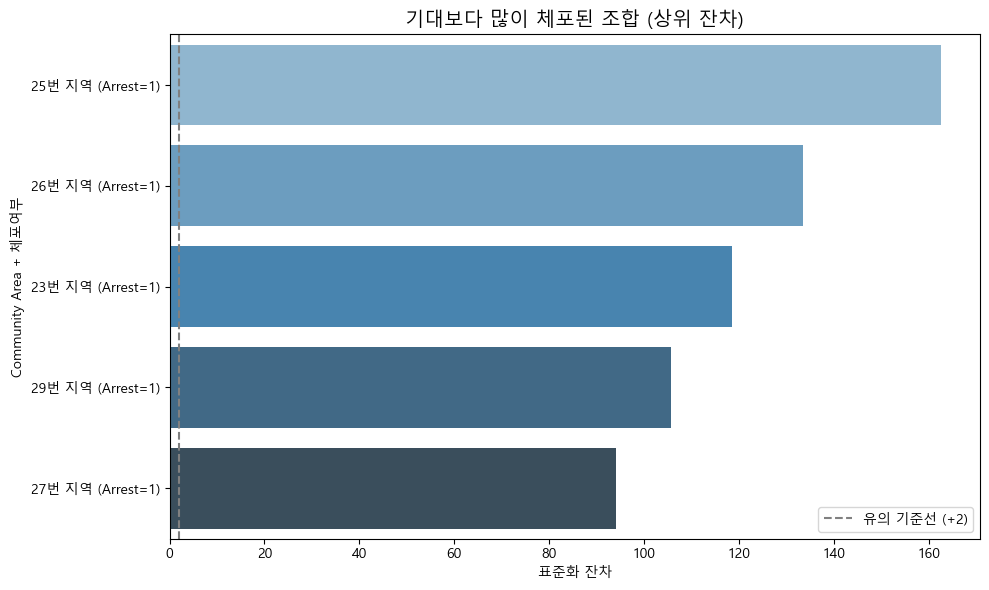

C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\4005951471.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized Residual', y='Label', data=bottom_residuals, palette='Reds_d')


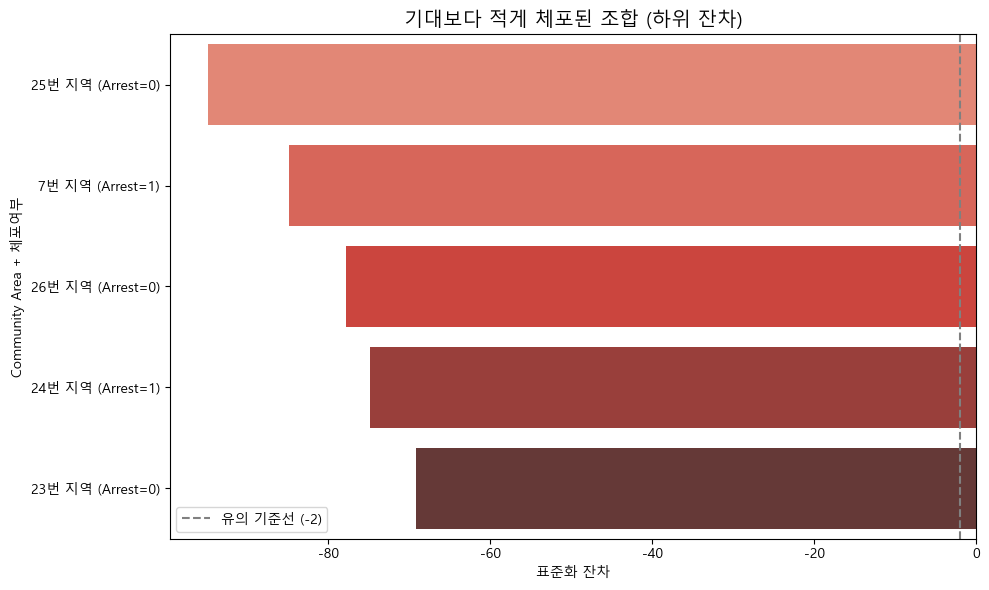

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌëúÏ§ÄÌôî ÏûîÏ∞® Í≥ÑÏÇ∞
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# DataFrame ÌòïÌÉúÎ°ú Î≥ÄÌôò
residuals_df = standardized_residuals.stack().reset_index()
residuals_df.columns = ['Community Area', 'Arrest (0=No,1=Yes)', 'Standardized Residual']
residuals_df['Abs Residual'] = residuals_df['Standardized Residual'].abs()

# ÏÉÅÏúÑ 5Í∞ú (Í∏∞ÎåÄÎ≥¥Îã§ ÎßéÏù¥ Ï≤¥Ìè¨Îêú Ï°∞Ìï©)
top_residuals = residuals_df.sort_values(by='Standardized Residual', ascending=False).head(5)
top_residuals['Label'] = top_residuals['Community Area'].astype(int).astype(str) + 'Î≤à ÏßÄÏó≠ (Arrest=' + top_residuals['Arrest (0=No,1=Yes)'].astype(str) + ')'

# ÌïòÏúÑ 5Í∞ú (Í∏∞ÎåÄÎ≥¥Îã§ Ï†ÅÍ≤å Ï≤¥Ìè¨Îêú Ï°∞Ìï©)
bottom_residuals = residuals_df.sort_values(by='Standardized Residual', ascending=True).head(5)
bottom_residuals['Label'] = bottom_residuals['Community Area'].astype(int).astype(str) + 'Î≤à ÏßÄÏó≠ (Arrest=' + bottom_residuals['Arrest (0=No,1=Yes)'].astype(str) + ')'

# ÏãúÍ∞ÅÌôî: ÏÉÅÏúÑ ÏûîÏ∞®
plt.figure(figsize=(10, 6))
sns.barplot(x='Standardized Residual', y='Label', data=top_residuals, palette='Blues_d')
plt.title('Í∏∞ÎåÄÎ≥¥Îã§ ÎßéÏù¥ Ï≤¥Ìè¨Îêú Ï°∞Ìï© (ÏÉÅÏúÑ ÏûîÏ∞®)', fontsize=14)
plt.axvline(x=2, color='gray', linestyle='--', label='Ïú†Ïùò Í∏∞Ï§ÄÏÑ† (+2)')
plt.legend()
plt.xlabel('ÌëúÏ§ÄÌôî ÏûîÏ∞®')
plt.ylabel('Community Area + Ï≤¥Ìè¨Ïó¨Î∂Ä')
plt.tight_layout()
plt.show()

# ÏãúÍ∞ÅÌôî: ÌïòÏúÑ ÏûîÏ∞®
plt.figure(figsize=(10, 6))
sns.barplot(x='Standardized Residual', y='Label', data=bottom_residuals, palette='Reds_d')
plt.title('Í∏∞ÎåÄÎ≥¥Îã§ Ï†ÅÍ≤å Ï≤¥Ìè¨Îêú Ï°∞Ìï© (ÌïòÏúÑ ÏûîÏ∞®)', fontsize=14)
plt.axvline(x=-2, color='gray', linestyle='--', label='Ïú†Ïùò Í∏∞Ï§ÄÏÑ† (-2)')
plt.legend()
plt.xlabel('ÌëúÏ§ÄÌôî ÏûîÏ∞®')
plt.ylabel('Community Area + Ï≤¥Ìè¨Ïó¨Î∂Ä')
plt.tight_layout()
plt.show()


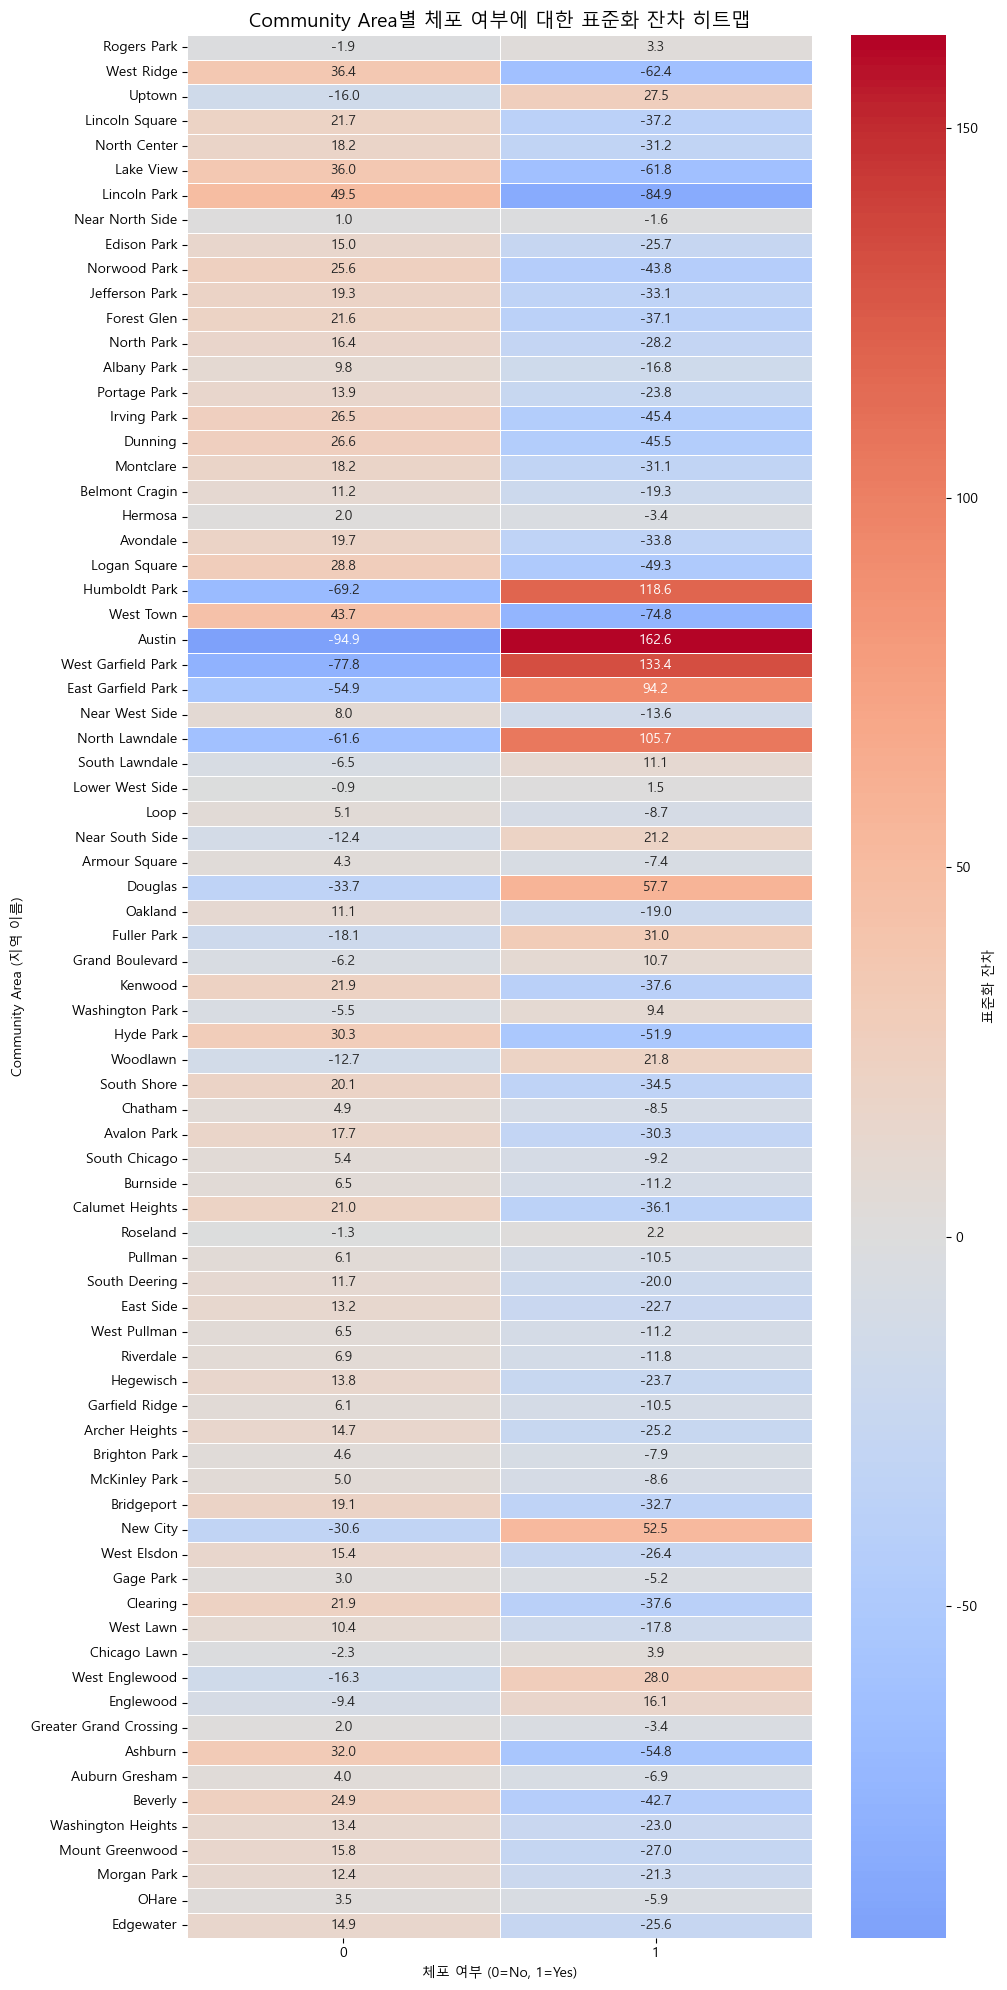

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Arrest Í∞í Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df['Arrest_numeric'] = df['Arrest'].astype(int)

# ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞
contingency_table = pd.crosstab(df['Community Area'], df['Arrest_numeric'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í∏∞ÎåÄÍ∞í Í≥ÑÏÇ∞
_, _, _, expected = chi2_contingency(contingency_table)

# ÌëúÏ§ÄÌôî ÏûîÏ∞® Í≥ÑÏÇ∞
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# --------------------------------
# üîπ ÏßÄÏó≠ Î≤àÌò∏ ‚Üí ÏßÄÏó≠ Ïù¥Î¶Ñ Îß§Ìïë
# --------------------------------
area_name_mapping = df[['Community Area', 'Community Area Name']].dropna().drop_duplicates()
area_dict = dict(zip(area_name_mapping['Community Area'], area_name_mapping['Community Area Name']))

# indexÏóê ÏßÄÏó≠ Ïù¥Î¶Ñ Îß§Ìïë
standardized_residuals_named = standardized_residuals.copy()
standardized_residuals_named.index = standardized_residuals_named.index.map(area_dict)

# --------------------------------
# üî∏ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
# --------------------------------
plt.figure(figsize=(10, 20))  # ÌÅ¨Í∏∞ Ï°∞Ï†à Í∞ÄÎä•
sns.heatmap(
    standardized_residuals_named,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'ÌëúÏ§ÄÌôî ÏûîÏ∞®'}
)
plt.title('Community AreaÎ≥Ñ Ï≤¥Ìè¨ Ïó¨Î∂ÄÏóê ÎåÄÌïú ÌëúÏ§ÄÌôî ÏûîÏ∞® ÌûàÌä∏Îßµ', fontsize=14)
plt.xlabel('Ï≤¥Ìè¨ Ïó¨Î∂Ä (0=No, 1=Yes)')
plt.ylabel('Community Area (ÏßÄÏó≠ Ïù¥Î¶Ñ)')
plt.tight_layout()
plt.show()


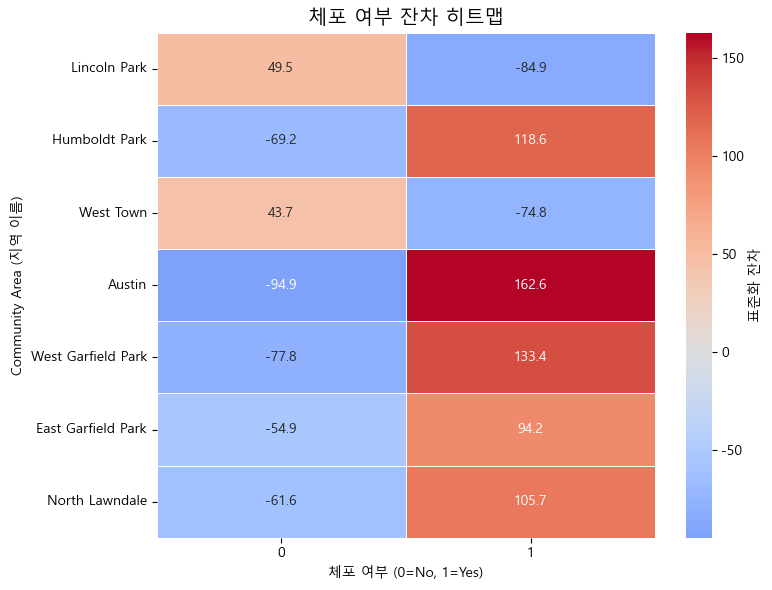

In [14]:
# 1. ÏÉÅÏúÑ 10Í∞ú Ï°∞Ìï© Ï§ë ÏßÄÏó≠ Ïù¥Î¶ÑÎßå ÎΩëÍ∏∞ (Ï§ëÎ≥µ Ï†úÍ±∞)
top10_areas = top10_resid['Community Area'].unique()

# 2. Ï†ÑÏ≤¥ ÌëúÏ§ÄÌôî ÏûîÏ∞®ÏóêÏÑú Ìï¥Îãπ ÏßÄÏó≠Îßå ÌïÑÌÑ∞ÎßÅ
filtered_residuals = standardized_residuals_named.loc[standardized_residuals_named.index.isin(top10_areas)]

# 3. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(
    filtered_residuals,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'ÌëúÏ§ÄÌôî ÏûîÏ∞®'}
)
plt.title('Ï≤¥Ìè¨ Ïó¨Î∂Ä ÏûîÏ∞® ÌûàÌä∏Îßµ', fontsize=14)
plt.xlabel('Ï≤¥Ìè¨ Ïó¨Î∂Ä (0=No, 1=Yes)')
plt.ylabel('Community Area (ÏßÄÏó≠ Ïù¥Î¶Ñ)')
plt.tight_layout()
plt.show()


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\2429393149.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


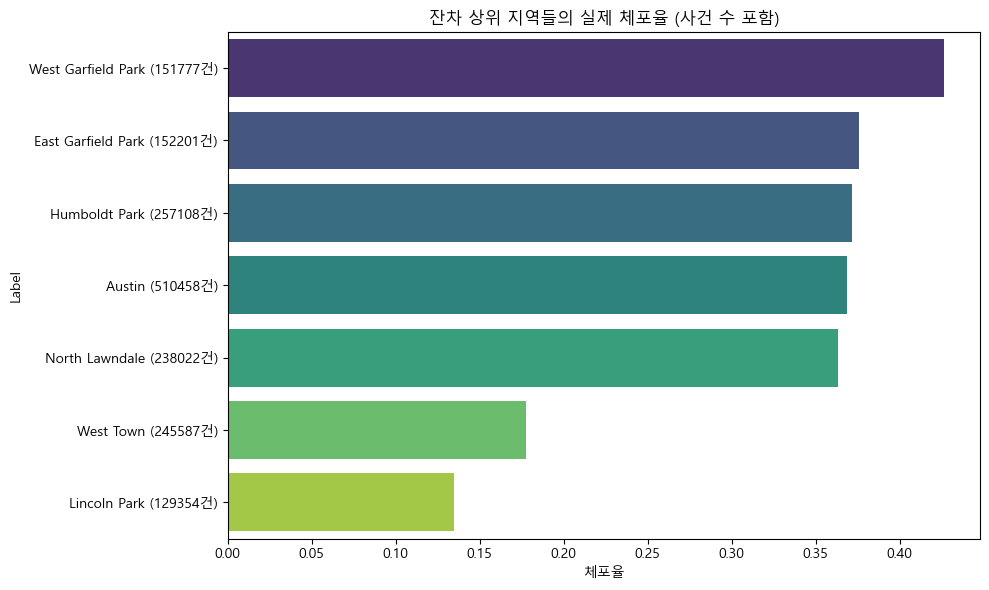

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. ÏûîÏ∞® ÏÉÅÏúÑ ÏßÄÏó≠ Ïù¥Î¶Ñ Î™©Î°ù
top_area_names = top10_resid['Community Area'].unique()

# 2. Ìï¥Îãπ ÏßÄÏó≠Îßå ÌïÑÌÑ∞ÎßÅ
subset_df = df[df['Community Area Name'].isin(top_area_names)]

# 3. Ï≤¥Ìè¨Ïú® Î∞è ÏÇ¨Í±¥ Ïàò Í≥ÑÏÇ∞
summary = (
    subset_df
    .groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'])
    .reset_index()
)

# ‚úÖ ÏßÄÏó≠ Ïù¥Î¶Ñ ÏòÜÏóê ÏÇ¨Í±¥ Ïàò Î∂ôÏù¥Í∏∞
summary['Label'] = summary['Community Area Name'] + f" (" + summary['Total_Cases'].astype(str) + "Í±¥)"

# Ï†ïÎ†¨
summary_sorted = summary.sort_values('Arrest_Rate', ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_sorted,
    x='Arrest_Rate',
    y='Label',
    palette='viridis'
)

plt.xlabel('Ï≤¥Ìè¨Ïú®')
plt.title('ÏûîÏ∞® ÏÉÅÏúÑ ÏßÄÏó≠Îì§Ïùò Ïã§Ï†ú Ï≤¥Ìè¨Ïú® (ÏÇ¨Í±¥ Ïàò Ìè¨Ìï®)')
plt.tight_layout()
plt.show()


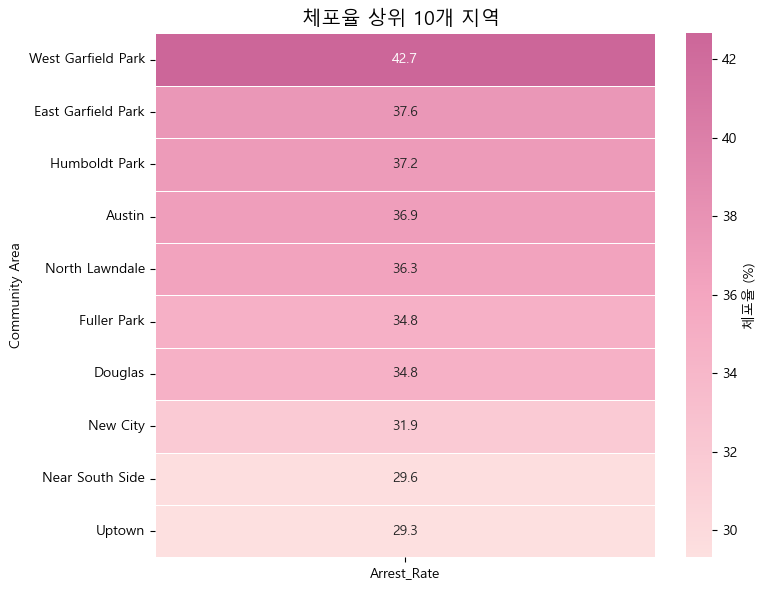

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. Ï≤¥Ìè¨Ïú® ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ Í≥ÑÏÇ∞
top10_area_summary = (
    df.groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'] * 100)
    .sort_values('Arrest_Rate', ascending=False)
    .head(10)
    .reset_index()
)

# 2. ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌïëÌÅ¨ Ïª¨Îü¨Îßµ: Ïó∞Ìïú ‚Üí ÏßÑÌïú ÌïëÌÅ¨
pink_gradient = LinearSegmentedColormap.from_list(
    "soft_pink", ["#fde0e0", "#f4a6c0", "#cc6699"]
)

# 3. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=top10_area_summary[['Arrest_Rate']].set_index(top10_area_summary['Community Area Name']),
    annot=True,
    fmt=".1f",
    cmap=pink_gradient,  # Ï≤¥Ìè¨Ïú® ÎÜíÏùÑÏàòÎ°ù ÏßÑÌïú ÌïëÌÅ¨
    cbar_kws={'label': 'Ï≤¥Ìè¨Ïú® (%)'},
    linewidths=0.5
)

plt.title('Ï≤¥Ìè¨Ïú® ÏÉÅÏúÑ 10Í∞ú ÏßÄÏó≠ ', fontsize=14)
plt.xlabel('')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


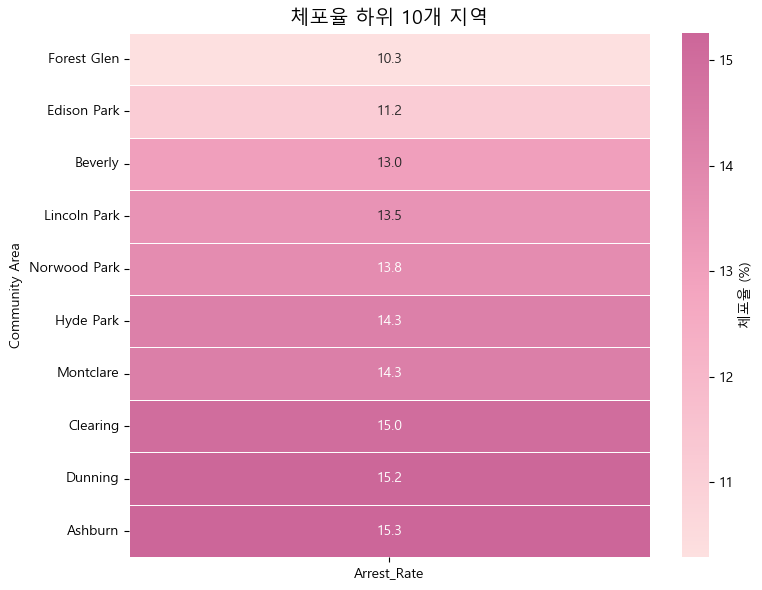

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌïëÌÅ¨ Ïª¨Îü¨Îßµ (Ïó∞Ìïú ‚Üí ÏßÑÌïú ÌïëÌÅ¨)
pink_gradient = LinearSegmentedColormap.from_list(
    "soft_pink", ["#fde0e0", "#f4a6c0", "#cc6699"]
)

# 2. Ï≤¥Ìè¨Ïú® ÌïòÏúÑ 10Í∞ú ÏßÄÏó≠ Í≥ÑÏÇ∞
bottom10_area_summary = (
    df.groupby('Community Area Name')
    .agg(
        Total_Cases=('Arrest_numeric', 'count'),
        Arrests=('Arrest_numeric', 'sum')
    )
    .assign(Arrest_Rate=lambda x: x['Arrests'] / x['Total_Cases'] * 100)
    .sort_values('Arrest_Rate', ascending=True)
    .head(10)
    .reset_index()
)

# 3. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=bottom10_area_summary[['Arrest_Rate']].set_index(bottom10_area_summary['Community Area Name']),
    annot=True,
    fmt=".1f",
    cmap=pink_gradient,  # ÎÇÆÏùÑÏàòÎ°ù Ïó∞ÌïòÍ≥†, ÎÜíÏùÑÏàòÎ°ù ÏßÑÌï¥Ïßê
    cbar_kws={'label': 'Ï≤¥Ìè¨Ïú® (%)'},
    linewidths=0.5
)

plt.title('Ï≤¥Ìè¨Ïú® ÌïòÏúÑ 10Í∞ú ÏßÄÏó≠', fontsize=14)
plt.xlabel('')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


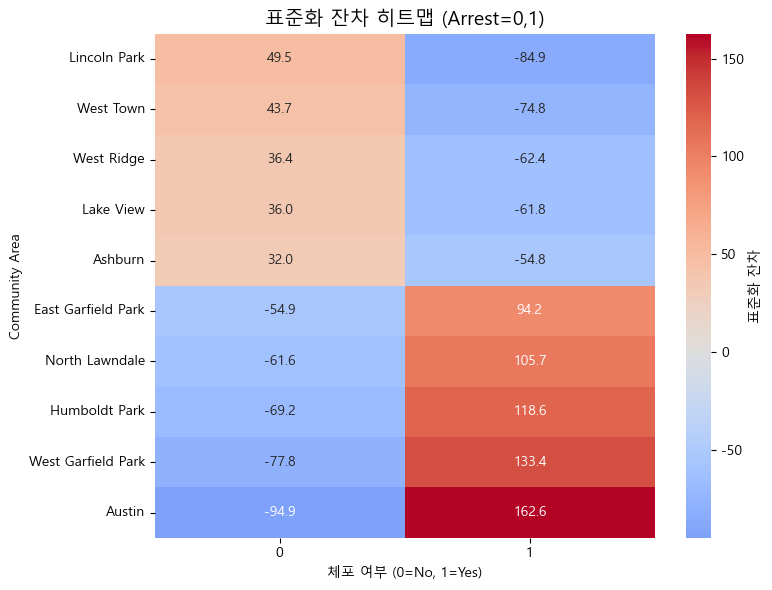

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. ÍµêÏ∞®Ìëú ÏÉùÏÑ±
contingency = pd.crosstab(df['Community Area Name'], df['Arrest_numeric'])

# 2. Ïπ¥Ïù¥Ï†úÍ≥± + Í∏∞ÎåÄÍ∞í + ÏûîÏ∞® Í≥ÑÏÇ∞
chi2, p, dof, expected = chi2_contingency(contingency)
residuals = (contingency - expected) / (expected ** 0.5)

# 3. ÏÉÅÏúÑ/ÌïòÏúÑ 5Í∞ú ÏßÄÏó≠ (Arrest=1 Í∏∞Ï§Ä)
top5 = residuals[1].sort_values(ascending=False).head(5)
bottom5 = residuals[1].sort_values(ascending=True).head(5)

# 4. ÌûàÌä∏ÎßµÏö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
selected = pd.concat([top5, bottom5]).sort_values()
heatmap_data = residuals.loc[selected.index]

# 5. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', center=0, cbar_kws={'label': 'ÌëúÏ§ÄÌôî ÏûîÏ∞®'})
plt.title('ÌëúÏ§ÄÌôî ÏûîÏ∞® ÌûàÌä∏Îßµ (Arrest=0,1)', fontsize=14)
plt.xlabel('Ï≤¥Ìè¨ Ïó¨Î∂Ä (0=No, 1=Yes)')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


In [33]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from math import sqrt

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & Ï†ÑÏ≤òÎ¶¨
df['Arrest_numeric'] = df['Arrest'].astype(int)

# 2. ÍµêÏ∞®Ìëú ÏÉùÏÑ± (ÏßÄÏó≠ √ó Ï≤¥Ìè¨Ïó¨Î∂Ä)
contingency = pd.crosstab(df['Community Area Name'], df['Arrest_numeric'])

# 3. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(contingency)

# 4. Í∏∞ÎåÄÎèÑÏàò DataFrame
df_expected = pd.DataFrame(expected,
                           index=contingency.index,
                           columns=contingency.columns)

# 5. Ïú†ÏùòÏÑ± ÌåêÏ†ï
alpha = 0.05
significance = "Í∏∞Í∞Å" if p < alpha else "Ï±ÑÌÉù"

# 6. ÌëúÏ§ÄÌôî ÏûîÏ∞® Í≥ÑÏÇ∞
std_res = (contingency - expected) / np.sqrt(expected)
df_std_res = pd.DataFrame(std_res,
                          index=contingency.index,
                          columns=contingency.columns)

# 7. ¬±1.96 Ïù¥ÏÉÅ ÏûîÏ∞® ÏÖÄ Ïó¨Î∂Ä (Ïú†ÏùòÎØ∏Ìïú ÏÖÄ ÌåêÎã®Ïö©)
sig_mask = np.abs(std_res) > 1.96
df_sig_mask = pd.DataFrame(sig_mask,
                           index=contingency.index,
                           columns=contingency.columns)

# 8. Cramer's V Í≥ÑÏÇ∞ (Ìö®Í≥º ÌÅ¨Í∏∞)
n = contingency.values.sum()
phi2 = chi2 / n
r, c = contingency.shape
k = min(r - 1, c - 1)
cramers_v = sqrt(phi2 / k)

# 9. ÏöîÏïΩ Ï∂úÎ†•
summary = {
    "Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ": round(chi2, 4),
    "p-value": round(p, 4),
    "ÏûêÏú†ÎèÑ": dof,
    "Í∑ÄÎ¨¥Í∞ÄÏÑ§": f"{significance} (Œ± = 0.05)",
    "Cramer's V": round(cramers_v, 4)
}

# Í≤∞Í≥º ÌôïÏù∏
print("‚úÖ Î∂ÑÏÑù ÏöîÏïΩ Í≤∞Í≥º:")
for k, v in summary.items():
    print(f"{k}: {v}")


‚úÖ Î∂ÑÏÑù ÏöîÏïΩ Í≤∞Í≥º:
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 199879.9195
p-value: 0.0
ÏûêÏú†ÎèÑ: 76
Í∑ÄÎ¨¥Í∞ÄÏÑ§: Í∏∞Í∞Å (Œ± = 0.05)
Cramer's V: 0.1554


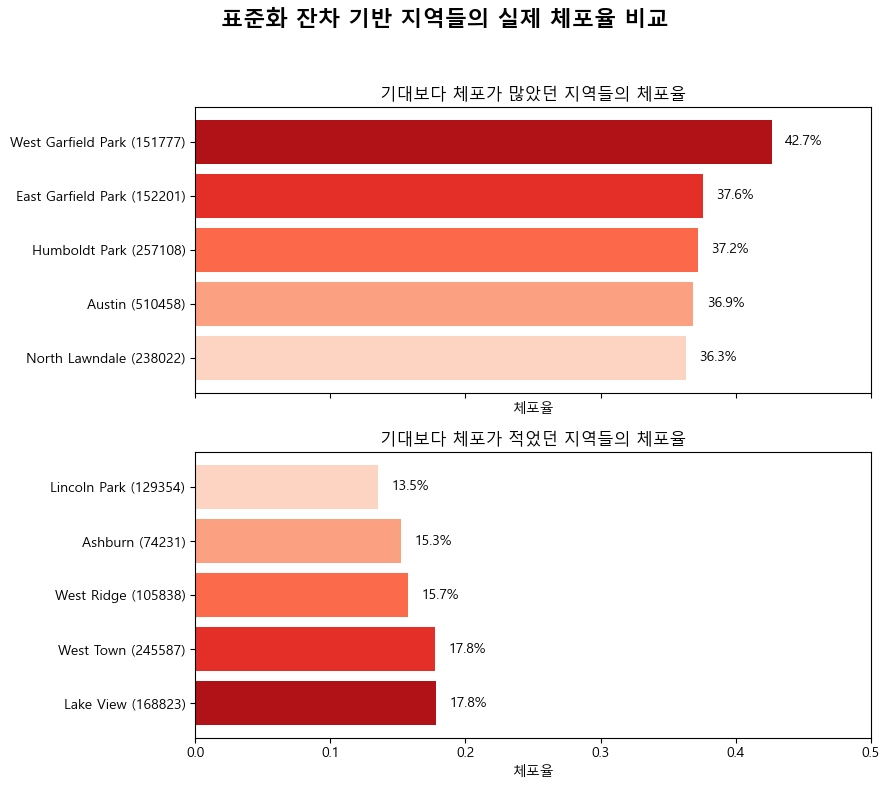

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÏûîÏ∞® Í∏∞Ï§Ä ÏÉÅ¬∑ÌïòÏúÑ 5Í∞ú ÏßÄÏó≠ (Arrest=1 Í∏∞Ï§Ä)
top5_residual = df_std_res[1].sort_values(ascending=False).head(5)
bottom5_residual = df_std_res[1].sort_values(ascending=True).head(5)

# 2. Ï≤¥Ìè¨Ïú®Í≥º ÏÇ¨Í±¥ Ïàò Í≥ÑÏÇ∞
area_stats = df.groupby("Community Area Name").agg(
    Arrest_Rate=("Arrest_numeric", "mean"),
    Case_Count=("Arrest_numeric", "count")
)

# 3. ÏûîÏ∞® ÏÉÅ¬∑ÌïòÏúÑ ÏßÄÏó≠Ïóê Ìï¥ÎãπÌïòÎäî Ï≤¥Ìè¨Ïú®/ÏÇ¨Í±¥ Ïàò Ï∂îÏ∂ú
top5_selected = area_stats.loc[top5_residual.index]
bottom5_selected = area_stats.loc[bottom5_residual.index]
top5_selected = top5_selected.sort_values(by="Arrest_Rate", ascending=True)  # ÎÜíÏùÄ Ïàú
bottom5_selected = bottom5_selected.sort_values(by="Arrest_Rate", ascending=False)  # ÎÇÆÏùÄ Ïàú

# 4. ÏßÄÏó≠ Ïù¥Î¶Ñ ÏòÜÏóê ÏÇ¨Í±¥ Ïàò ÌëúÏãú
top5_selected.index = [f"{name} ({count})" for name, count in zip(top5_selected.index, top5_selected["Case_Count"])]
bottom5_selected.index = [f"{name} ({count})" for name, count in zip(bottom5_selected.index, bottom5_selected["Case_Count"])]

# 5. ÏãúÍ∞ÅÌôî (ÏúÑ: ÏÉÅÏúÑ / ÏïÑÎûò: ÌïòÏúÑ)
fig, axes = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

# ‚ñ∂ ÏÉÅÏúÑ ÏûîÏ∞® ÏßÄÏó≠
bars_top = axes[0].barh(top5_selected.index, top5_selected["Arrest_Rate"], color=sns.color_palette("Reds", 5))
axes[0].set_title("Í∏∞ÎåÄÎ≥¥Îã§ Ï≤¥Ìè¨Í∞Ä ÎßéÏïòÎçò ÏßÄÏó≠Îì§Ïùò Ï≤¥Ìè¨Ïú®")
axes[0].set_xlim(0, 0.5)
axes[0].set_xlabel("Ï≤¥Ìè¨Ïú®")
for bar in bars_top:
    width = bar.get_width()
    axes[0].text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.1%}", va='center', fontsize=10)

# ‚ñ∂ ÌïòÏúÑ ÏûîÏ∞® ÏßÄÏó≠
bars_bot = axes[1].barh(bottom5_selected.index, bottom5_selected["Arrest_Rate"], color=sns.color_palette("Reds_r", 5))
axes[1].set_title("Í∏∞ÎåÄÎ≥¥Îã§ Ï≤¥Ìè¨Í∞Ä Ï†ÅÏóàÎçò ÏßÄÏó≠Îì§Ïùò Ï≤¥Ìè¨Ïú®")
axes[1].set_xlim(0, 0.5)
axes[1].set_xlabel("Ï≤¥Ìè¨Ïú®")
for bar in bars_bot:
    width = bar.get_width()
    axes[1].text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.1%}", va='center', fontsize=10)

# ‚ñ∂ Ï†ÑÏ≤¥ Ï†úÎ™©
plt.suptitle("ÌëúÏ§ÄÌôî ÏûîÏ∞® Í∏∞Î∞ò ÏßÄÏó≠Îì§Ïùò Ïã§Ï†ú Ï≤¥Ìè¨Ïú® ÎπÑÍµê", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# Ï†ïÎ†¨ Ï∂îÍ∞Ä




In [43]:
 pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
    --------------------------------------- 1.8/101.7 MB 6.3 MB/s eta 0:00:16
   - -------------------------------------- 4.2/101.7 MB 9.0 MB/s eta 0:00:11
   -- ------------------------------------- 6.8/101.7 MB 9.8 MB/s eta 0:00:10
   --- ------------------------------------ 8.7/101.7 MB 9.8 MB/s eta 0:00:10
   ---- ----------------------------------- 11.0/101.7 MB 9.8 MB/s eta 0:00:10
   ----- ---------------------------------- 13.4/101.7 MB 10.1 MB/s eta 0:00:09
   ----- ---------------------------------- 14.7/101.7 MB 10.3 MB/s eta 0:00:09
   ------ --------------------------------- 15.5/101.7 MB 9.0 MB/s eta 0:00:10
   ------ --------------------------------- 16.0/101.7 MB 8.4 MB/s eta 0:00:11
   ------- -------------------------------- 17.8/101.7 MB 8.2 MB/s eta 0:00:11
   ------- -------------------------------- 20.2/101.7 MB 8.5 MB/s eta

In [49]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier

# 3. Î≤îÏ£ºÌòï Ïª¨Îüº Î≥ÄÌôò (NaN ‚Üí 'Missing')
for col in ['Primary Type', 'Description', 'Community Area', 'Location Description']:
    df[col] = df[col].astype(str).fillna('Missing')

# 4. Feature / Target ÏÑ§Ï†ï
features = [
    'Year', 'Month', 'Primary Type', 'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
    'Location Description'
]
target = 'Arrest'

X = df[features]
y = df[target].astype(int)

# 5. CatBoostÏö© Î≤îÏ£ºÌòï Ïª¨Îüº ÏßÄÏ†ï
cat_features = ['Primary Type', 'Description', 'Community Area', 'Location Description']

# 6. ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÏûêÎèô Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), weights))
print("ÏûêÎèô Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò:", class_weights)

# 7. Train/Test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 8. CatBoostClassifier Ï†ïÏùò + Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ Ï†ÅÏö©
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    class_weights=class_weights,  # ‚úÖ ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ
    early_stopping_rounds=30,
    verbose=100,
    random_seed=42
)

# 9. Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


üìä ÏûêÎèô Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {0: 0.6701683819241534, 1: 1.9691330855542175}
0:	learn: 0.7786947	test: 0.7775381	best: 0.7775381 (0)	total: 6.23s	remaining: 31m 3s
100:	learn: 0.8146902	test: 0.8144995	best: 0.8144995 (100)	total: 5m 21s	remaining: 10m 34s
200:	learn: 0.8163192	test: 0.8159530	best: 0.8159530 (200)	total: 10m 59s	remaining: 5m 25s
299:	learn: 0.8172405	test: 0.8167902	best: 0.8167902 (299)	total: 16m 41s	remaining: 0us

bestTest = 0.8167902081
bestIteration = 299

              precision    recall  f1-score   support

           0       0.92      0.90      0.91   1235014
           1       0.72      0.76      0.74    420321

    accuracy                           0.86   1655335
   macro avg       0.82      0.83      0.82   1655335
weighted avg       0.87      0.86      0.86   1655335



In [51]:
from imblearn.over_sampling import SMOTE

# 1. Î≤îÏ£ºÌòï/ÏàòÏπòÌòï ÎÇòÎàÑÍ∏∞
cat_cols = ['Primary Type', 'Description', 'Community Area', 'Location Description']
num_cols = [col for col in X_train.columns if col not in cat_cols]

# 2. ÏàòÏπòÌòïÎßå SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_num_resampled, y_resampled = smote.fit_resample(X_train[num_cols], y_train)

# 3. Î≤îÏ£ºÌòï Ïª¨Îüº ÏõêÎ≥∏ÏóêÏÑú Î≥µÏÇ¨Ìï¥ÏÑú Î∂ôÏù¥Í∏∞ (reset index ÌïÑÏöî!)
X_cat = X_train[cat_cols].reset_index(drop=True).iloc[:len(X_num_resampled)]
X_resampled = pd.concat([X_num_resampled.reset_index(drop=True), X_cat], axis=1)


In [55]:
import folium
from folium import Choropleth, CircleMarker

# ÏßÄÎèÑ Ï§ëÏã¨ ÏÑ§Ï†ï (Ïòà: ÏãúÏπ¥Í≥† Ï§ëÏã¨ Ï¢åÌëú)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Community AreaÎ≥Ñ ÌèâÍ∑† ÏúÑÍ≤ΩÎèÑ, Ï≤¥Ìè¨ÌôïÎ•† ÏßëÍ≥Ñ
area_stats = df.groupby('Community Area').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Arrest_Prob': 'mean'
}).reset_index()

# Circle MarkerÎ°ú ÏãúÍ∞ÅÌôî
for _, row in area_stats.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color=None,
        fill=True,
        fill_color=plt.cm.Reds(row['Arrest_Prob']),  # Ïª¨Îü¨ÎßµÏùÑ ÏàòÏπòÎ°ú Î≥ÄÌôò
        fill_opacity=0.7,
        popup=f"CA: {row['Community Area']}<br>Ï≤¥Ìè¨ÌôïÎ•†: {row['Arrest_Prob']:.2%}"
    ).add_to(m)

m.save("arrest_probability_map.html")


In [56]:
m.save("arrest_map.html")  # Ïù¥Í±∏Î°ú Ï†ÄÏû•
# Ï†ÄÏû•Ìïú html ÌååÏùºÏùÑ ÏßÅÏ†ë Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Ïó¥Ïñ¥Î¥ê!


In [62]:
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# colormap Ï§ÄÎπÑ (0~1 Î≤îÏúÑ Reds Ïª¨Îü¨Îßµ)
colormap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)  # 0~1 Ï†ïÍ∑úÌôî

# ÏßÄÎèÑ Ï¥àÍ∏∞Ìôî
m = folium.Map(location=[41.87, -87.62], zoom_start=10)

# ÏòàÏ∏° ÌôïÎ•† Í∏∞Ï§Ä ÏãúÍ∞ÅÌôî (ÏÉâÏÉÅ & ÌÅ¨Í∏∞ Ï°∞Ï†ï)
for _, row in area_stats.iterrows():
    prob = row['Arrest_Prob']
    rgba = colormap(norm(prob))                 # RGBA ÏÉâÏÉÅ ÏñªÍ∏∞
    hex_color = mcolors.to_hex(rgba)            # HEXÎ°ú Î≥ÄÌôò

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=prob * 30,  # ÌôïÎ•† Í∏∞Î∞ò ÌÅ¨Í∏∞
        color=None,
        fill=True,
        fill_opacity=0.8,
        fill_color=hex_color,  # ‚úî Ïó∞ÌïëÌÅ¨~Îπ®Í∞ï Ï†ÅÏö©
        tooltip=f"CA: {row['Community Area']}<br>Ï≤¥Ìè¨ÌôïÎ•†: {prob*100:.2f}%",
    ).add_to(m)

# ÏßÄÎèÑ Ï†ÄÏû•
m.save("arrest_prediction_map.html")


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\2466524966.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Reds')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276672 entries, 0 to 8276671
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        int64  
 1   Case Number               object 
 2   Date                      object 
 3   Block                     object 
 4   IUCR                      object 
 5   Primary Type              object 
 6   Description               object 
 7   Location Description      object 
 8   Arrest                    bool   
 9   Domestic                  bool   
 10  Beat                      int64  
 11  District                  float64
 12  Ward                      float64
 13  Community Area            object 
 14  FBI Code                  object 
 15  X Coordinate              float64
 16  Y Coordinate              float64
 17  Year                      int64  
 18  Updated On                object 
 19  Latitude                  float64
 20  Longitude               

In [75]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from folium.features import GeoJsonTooltip

# 1. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df_geo = pd.read_csv("CommAreas_20250408.csv", encoding='utf-8', low_memory=False)  # ÏãúÏπ¥Í≥† Í≤ΩÍ≥Ñ

# 2. Community Area Ïù¥Î¶Ñ Îß§Ìïë
df_geo = df_geo[['AREA_NUMBE', 'COMMUNITY', 'the_geom']].drop_duplicates()
df_geo.columns = ['Community Area', 'Community Area Name', 'geometry_str']

# 3. geometry Î¨∏ÏûêÏó¥ÏùÑ shapely PolygonÏúºÎ°ú Î≥ÄÌôò
df_geo['geometry'] = df_geo['geometry_str'].apply(wkt.loads)
gdf_geo = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')

# 4. Community Area Î≤àÌò∏Î•º Î¨∏ÏûêÏó¥Î°ú ÌÜµÏùº
gdf_geo['Community Area'] = gdf_geo['Community Area'].astype(str)
df['Community Area'] = df['Community Area'].astype(float).astype(int).astype(str)



# 5. ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
features = [
    'Year', 'Month', 'Primary Type', 'Description', 'Community Area',
    'Latitude', 'Longitude', 'Offense Level Median',
    'Dist_to_Nearest_HighRisk', 'min_distance_to_police',
    'Location Description'
]
df['Arrest_Prob'] = model.predict_proba(df[features])[:, 1]

# 6. ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Ï≤¥Ìè¨ ÌôïÎ•†
area_avg = df.groupby('Community Area')['Arrest_Prob'].mean().reset_index()

# 7. Î≥ëÌï© (ÏßÄÏó≠ Ïù¥Î¶ÑÏùÄ gdfÏóê ÏûàÏùå)
gdf = gdf_geo.merge(area_avg, on='Community Area', how='left')

# 8. Choropleth Ïä§ÌÉÄÏùº Ìï®Ïàò
cmap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)

def style_function(feature):
    prob = feature['properties'].get('Arrest_Prob')
    if prob is None or pd.isna(prob):
        return {'fillOpacity': 0.1, 'color': 'lightgrey', 'fillColor': 'lightgrey', 'weight': 0.5}
    rgba = cmap(norm(prob))
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': mcolors.to_hex(rgba),
        'color': 'black'
    }

# 9. Folium ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[41.87, -87.62], zoom_start=10)

folium.GeoJson(
    gdf.to_json(),
    name="Community Area Ï≤¥Ìè¨ ÌôïÎ•†",
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=["Community Area Name", "Arrest_Prob"],
        aliases=["ÏßÄÏó≠ Ïù¥Î¶Ñ", "ÏòàÏ∏° Ï≤¥Ìè¨ÌôïÎ•†"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# 10. ÏßÄÎèÑ Ï†ÄÏû•
m.save("Community_Area_Prediction_Map.html")


CatBoostError: Invalid type for cat_feature[non-default value idx=485,feature_idx=10]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [77]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from folium.features import GeoJsonTooltip

# 1. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df_geo = pd.read_csv("CommAreas_20250408.csv", encoding='utf-8', low_memory=False)
df = pd.read_csv("df_sample.csv")  # dfÎèÑ Îã§Ïãú Î∂àÎü¨Ïò®Îã§Í≥† Í∞ÄÏ†ï

# 2. Community Area Ïù¥Î¶Ñ Îß§Ìïë
df_geo = df_geo[['AREA_NUMBE', 'COMMUNITY', 'the_geom']].drop_duplicates()
df_geo.columns = ['Community Area', 'Community Area Name', 'geometry_str']

# 3. geometry Î≥ÄÌôò ‚Üí GeoDataFrame
df_geo['geometry'] = df_geo['geometry_str'].apply(wkt.loads)
gdf_geo = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')

# 4. Community Area Î≤àÌò∏ ÌÉÄÏûÖ ÌÜµÏùº
gdf_geo['Community Area'] = gdf_geo['Community Area'].astype(str)
df['Community Area'] = df['Community Area'].astype(float).astype(int).astype(str)

# 5. Ïã§Ï†ú Ï≤¥Ìè¨Ïú® Í≥ÑÏÇ∞
actual_rate = df.groupby('Community Area')['Arrest'].mean().reset_index()
actual_rate.columns = ['Community Area', 'Actual_Arrest_Rate']

# 6. Î≥ëÌï©
gdf_actual = gdf_geo.merge(actual_rate, on='Community Area', how='left')

# 7. Choropleth Ïä§ÌÉÄÏùº Ìï®Ïàò
cmap = cm.get_cmap('Reds')
norm = mcolors.Normalize(vmin=0, vmax=1)

def style_function_actual(feature):
    rate = feature['properties'].get('Actual_Arrest_Rate')
    if rate is None or pd.isna(rate):
        return {'fillOpacity': 0.1, 'color': 'lightgrey', 'fillColor': 'lightgrey', 'weight': 0.5}
    rgba = cmap(norm(rate))
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': mcolors.to_hex(rgba),
        'color': 'black'
    }

# 8. Folium ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[41.87, -87.62], zoom_start=10,tiles="cartodbpositron")

folium.GeoJson(
    gdf_actual.to_json(),
    name="Ïã§Ï†ú Ï≤¥Ìè¨Ïú® Choropleth",
    style_function=style_function_actual,
    tooltip=GeoJsonTooltip(
        fields=["Community Area Name", "Actual_Arrest_Rate"],
        aliases=["ÏßÄÏó≠ Ïù¥Î¶Ñ", "Ïã§Ï†ú Ï≤¥Ìè¨Ïú®"],
        localize=True,
        sticky=False,
        labels=True
    )
).add_to(m)

# 9. Ï†ÄÏû•
m.save("Community_Area_Actual_Arrest_Map.html")


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_30132\522236678.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


In [73]:
# Ïò§Ïä§Ìã¥ ÏßÄÏó≠Îßå ÌïÑÌÑ∞ÎßÅ
austin_df = df[df['Community Area Name'].str.upper() == 'AUSTIN']

# Ï≤¥Ìè¨Ïú® Í≥ÑÏÇ∞
austin_arrest_rate = austin_df['Arrest'].mean()

print(f"AUSTIN ÏßÄÏó≠ Ïã§Ï†ú Ï≤¥Ìè¨Ïú®: {austin_arrest_rate:.4f}")


AUSTIN ÏßÄÏó≠ Ïã§Ï†ú Ï≤¥Ìè¨Ïú®: 0.3864


In [76]:
print(df[cat_features].isna().sum())

Primary Type             0
Description              0
Community Area           0
Location Description    78
dtype: int64
